
# 📈 M5.1 KPI長條圖與比較圖

本課程介紹如何創建有效的KPI (關鍵績效指標) 視覺化圖表，這些圖表廣泛應用於商業報告和儀表板中。我們將學習如何設計清晰、直觀的長條圖、比較圖和其他特殊圖表，以有效傳達業務績效和趨勢。KPI視覺化是數據分析師的核心技能，能讓複雜的業務數據轉化為易於理解的視覺信息。


## 🎯 教學目標

- 📊 掌握設計有效KPI視覺化的原則和最佳實踐
- 🔄 學習創建不同類型的比較圖表（同比增長、環比增長等）
- 🎨 探索進階圖表格式化和定制技巧
- 💡 瞭解如何選擇適合特定KPI的圖表類型

In [35]:
# 環境設置
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from matplotlib.ticker import FuncFormatter

# 忽略警告
warnings.filterwarnings('ignore')

# 設置繪圖風格
plt.style.use('seaborn-v0_8-whitegrid')

In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# # 設置可視化風格
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# 微軟正黑體或思源黑體路徑 (請依你電腦為準)
font_path = "C:/Windows/Fonts/msjh.ttc"  # 或 simsun.ttc, NotoSansCJK, 等

# 建立 FontProperties
font_prop = fm.FontProperties(fname=font_path)

# 設定 matplotlib 全域字型（包括標題、座標軸、legend）
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 避免負號亂碼

# 設置顯示選項
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 12)
pd.set_option('display.width', 100)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)


## 1. KPI視覺化的基本原則

在創建KPI（關鍵績效指標）視覺化時，有幾個重要原則需要遵循：

1. **明確性優先**：確保圖表清晰地傳達核心指標和訊息
2. **相關上下文**：提供適當的比較點和歷史趨勢
3. **視覺層次**：強調重要資訊，淡化次要細節
4. **一致的設計**：在整個報告中使用一致的顏色編碼和風格
5. **適當的圖表類型**：根據資料性質選擇合適的圖表類型

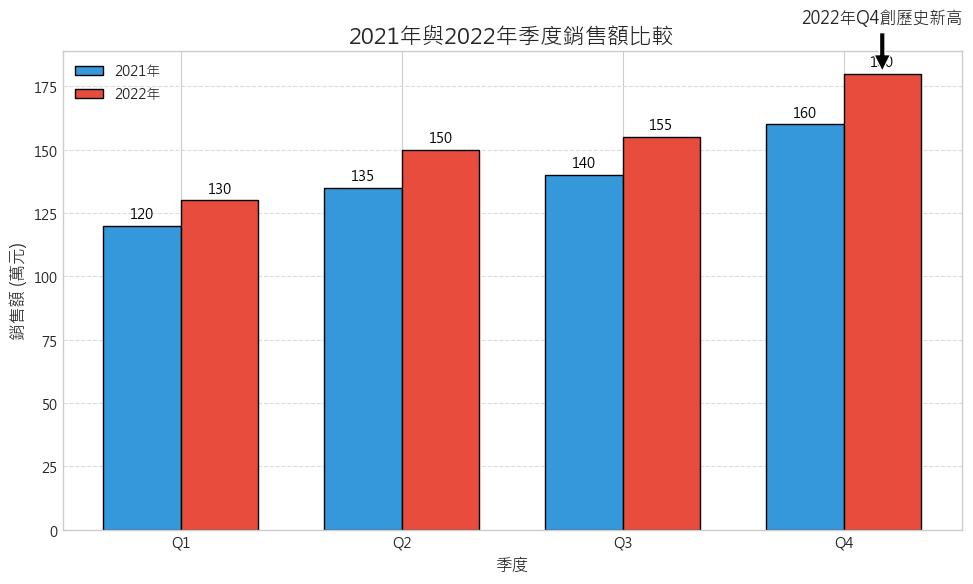

In [37]:
# 創建示例數據 - 某公司近兩年的季度銷售額
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
sales_2021 = [120, 135, 140, 160]
sales_2022 = [130, 150, 155, 180]

# 繪製基本KPI長條圖 - 年度銷售額比較
plt.figure(figsize=(10, 6))

# 設置長條圖位置
x = np.arange(len(quarters))
width = 0.35

# 繪製長條
plt.bar(x - width/2, sales_2021, width, label='2021年', color='#3498db', edgecolor='black', linewidth=1)
plt.bar(x + width/2, sales_2022, width, label='2022年', color='#e74c3c', edgecolor='black', linewidth=1)

# 添加數值標籤
for i, v in enumerate(sales_2021):
    plt.text(i - width/2, v + 3, f'{v}', ha='center', fontsize=10, color='black')
    
for i, v in enumerate(sales_2022):
    plt.text(i + width/2, v + 3, f'{v}', ha='center', fontsize=10, color='black')

# 設置圖表元素
plt.xlabel('季度', fontsize=12)
plt.ylabel('銷售額 (萬元)', fontsize=12)
plt.title('2021年與2022年季度銷售額比較', fontsize=16)
plt.xticks(x, quarters, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 添加註釋 - 強調重要資訊
plt.annotate('2022年Q4創歷史新高', 
            xy=(3 + width/2, sales_2022[3]), 
            xytext=(3 + width/2, sales_2022[3] + 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center')

plt.tight_layout()
plt.show()


## 2. 同比增長率圖表

在商業分析中，"同比增長"（Year-over-Year, YoY）是衡量業務表現的重要指標，它比較現在與去年同期的數據。這種比較可以消除季節性因素的影響，幫助我們更清晰地看到業務的真實成長情況。

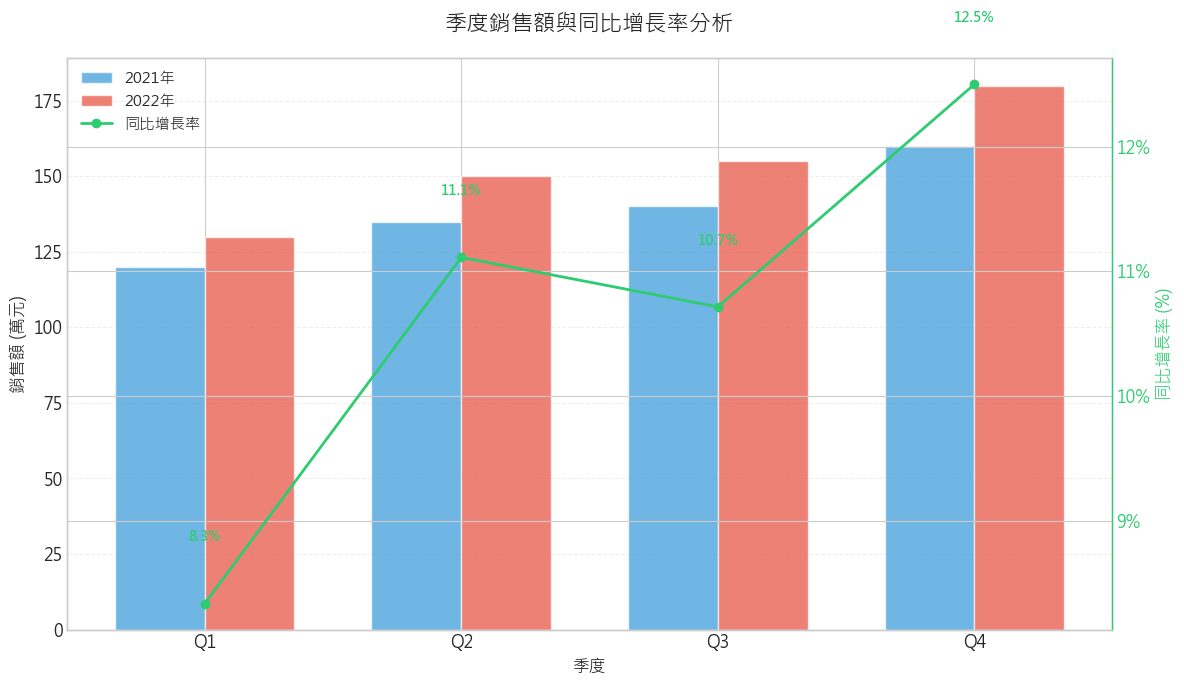

In [38]:
# 計算同比增長率 (YoY Growth)
yoy_growth = [(sales_2022[i] - sales_2021[i]) / sales_2021[i] * 100 for i in range(len(quarters))]

# 創建增長率圖表
plt.figure(figsize=(12, 7))

# 創建複合圖表 - 長條圖加折線圖
ax1 = plt.gca()
ax2 = ax1.twinx()  # 創建共享x軸的第二個y軸

# 畫出原始銷售額 (長條圖)
bars1 = ax1.bar(x - width/2, sales_2021, width, label='2021年', color='#3498db', alpha=0.7)
bars2 = ax1.bar(x + width/2, sales_2022, width, label='2022年', color='#e74c3c', alpha=0.7)

# 畫出同比增長率 (折線圖)
line = ax2.plot(x, yoy_growth, 'o-', color='#2ecc71', linewidth=2, label='同比增長率')

# 為增長率添加數值標籤
for i, v in enumerate(yoy_growth):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10, color='#2ecc71', fontweight='bold')

# 設置左側Y軸 (銷售額)
ax1.set_xlabel('季度', fontsize=12)
ax1.set_ylabel('銷售額 (萬元)', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(quarters)

# 設置右側Y軸 (增長率)
ax2.set_ylabel('同比增長率 (%)', fontsize=12, color='#2ecc71')
ax2.tick_params(axis='y', colors='#2ecc71')
ax2.spines['right'].set_color('#2ecc71')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# 添加網格和標題
ax1.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.title('季度銷售額與同比增長率分析', fontsize=16, pad=20)

# 合併圖例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()


## 3. 瀑布圖 (Waterfall Chart)

瀑布圖是商業報告中常用的工具，可以直觀地展示一個數值如何從起始值通過一系列中間變化最終到達終點值。這種圖表特別適合展示銷售額、利潤或預算的增減變化。

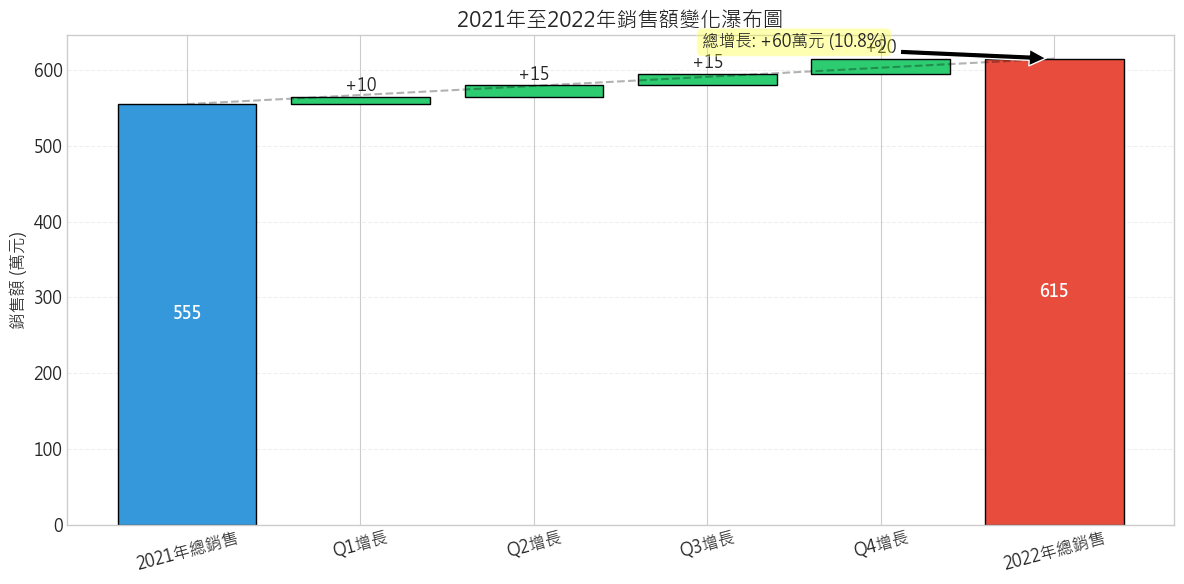

In [40]:
# 創建瀑布圖數據
categories = ['2021年總銷售', 'Q1增長', 'Q2增長', 'Q3增長', 'Q4增長', '2022年總銷售']
values = [sum(sales_2021), 
          sales_2022[0] - sales_2021[0], 
          sales_2022[1] - sales_2021[1],
          sales_2022[2] - sales_2021[2],
          sales_2022[3] - sales_2021[3],
          sum(sales_2022)]

# 數據處理
# 索引0和最後一個索引是總數，中間的是變化量
is_total = np.zeros(len(values))
is_total[0] = 1  # 2021年總銷售
is_total[-1] = 1  # 2022年總銷售

# 計算每一步的累積和
cumulative = np.zeros(len(values))
cumulative[0] = values[0]
for i in range(1, len(values)-1):
    cumulative[i] = cumulative[i-1] + values[i]
cumulative[-1] = values[-1]  # 最後一個值是2022年總銷售

# 瀑布圖的底部位置
bottoms = np.zeros(len(values))
bottoms[1:-1] = cumulative[:-2]  # 中間變化項的底部是前一項的累積和

# 繪製瀑布圖
plt.figure(figsize=(12, 6))

# 繪製中間的變化條形
for i in range(len(values)):
    if is_total[i]:  # 總數條形
        plt.bar(categories[i], values[i], bottom=0, color='#3498db' if i == 0 else '#e74c3c',
               edgecolor='black', linewidth=1)
    else:  # 變化條形
        color = '#2ecc71' if values[i] > 0 else '#e74c3c'  # 正值綠色，負值紅色
        plt.bar(categories[i], values[i], bottom=bottoms[i], color=color,
               edgecolor='black', linewidth=1)

# 顯示數值
for i, (v, b) in enumerate(zip(values, bottoms)):
    color = 'black'
    if i == 0 or i == len(values)-1:  # 總數
        plt.text(i, v/2, f'{v}', ha='center', va='center', color='white', fontweight='bold')
    else:  # 變化量
        sign = '+' if v > 0 else ''
        plt.text(i, b + v + 2, f'{sign}{v}', ha='center', va='bottom')

# 添加從起始值到終止值的連線
plt.plot([0, len(values)-1], [values[0], values[-1]], 'k--', alpha=0.3)

# 設置圖表元素
plt.title('2021年至2022年銷售額變化瀑布圖', fontsize=15)
plt.ylabel('銷售額 (萬元)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=15)

# 添加註釋
plt.annotate(f'總增長: +{values[-1] - values[0]}萬元 ({(values[-1] - values[0])/values[0]*100:.1f}%)',
            xy=(len(values)-1, values[-1]),
            xytext=(len(values)-2.5, values[-1] + 15),
            arrowprops=dict(facecolor='black', shrink=0.05),
            ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3))

plt.tight_layout()
plt.show()


## 4. 子彈圖 (Bullet Chart)

子彈圖是由著名的可視化專家Stephen Few設計的，專門用於展示KPI的目標達成情況。這種圖表可以在有限的空間內同時展示實際值、目標值和評估範圍。

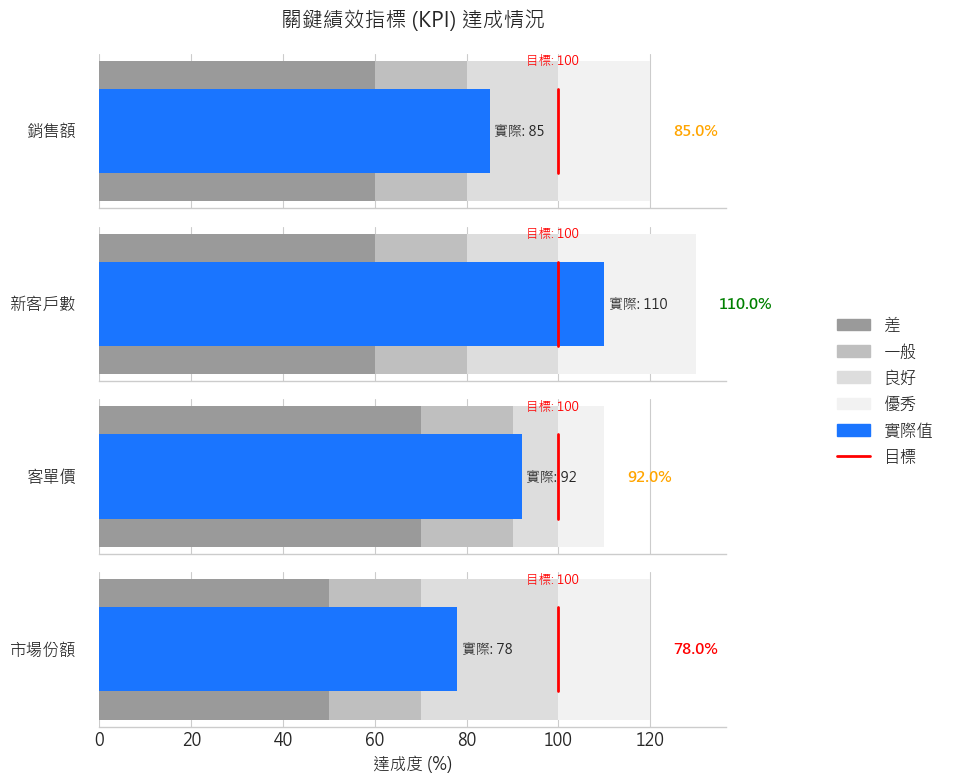

In [42]:
# 創建多個KPI的子彈圖數據
kpi_names = ['銷售額', '新客戶數', '客單價', '市場份額']
actual = [85, 110, 92, 78]  # 實際達成值
targets = [100, 100, 100, 100]  # 目標值 (標準化為100)
ranges = [  # 表現範圍 [差, 一般, 良好, 優秀]
    [0, 60, 80, 100, 120],
    [0, 60, 80, 100, 130],
    [0, 70, 90, 100, 110],
    [0, 50, 70, 100, 120]
]

# 繪製子彈圖
fig, axes = plt.subplots(len(kpi_names), 1, figsize=(10, 8), sharex=True)

for i, (ax, name, act, tar, rang) in enumerate(zip(axes, kpi_names, actual, targets, ranges)):
    # 繪製量表背景 (表現等級區間)
    ax.barh(1, rang[4] - rang[0], height=0.5, left=rang[0], color='#f2f2f2', edgecolor='none')
    ax.barh(1, rang[3] - rang[0], height=0.5, left=rang[0], color='#dddddd', edgecolor='none')
    ax.barh(1, rang[2] - rang[0], height=0.5, left=rang[0], color='#bfbfbf', edgecolor='none')
    ax.barh(1, rang[1] - rang[0], height=0.5, left=rang[0], color='#9a9a9a', edgecolor='none')
    
    # 繪製實際值
    ax.barh(1, act, height=0.3, color='#1a75ff', edgecolor='none')
    
    # 繪製目標值標記
    ax.plot([tar, tar], [0.85, 1.15], color='red', linewidth=2)
    
    # 添加標籤
    ax.text(rang[0] - 5, 1, name, ha='right', va='center', fontsize=12)
    ax.text(act + 1, 1, f'實際: {act}', va='center', fontsize=10)
    ax.text(tar - 7, 1.25, f'目標: {tar}', va='center', fontsize=9, color='red')
    
    # 百分比達成率
    completion = act / tar * 100
    color = 'green' if completion >= 100 else ('orange' if completion >= 80 else 'red')
    ax.text(rang[4] + 5, 1, f'{completion:.1f}%', va='center', fontsize=11, 
           fontweight='bold', color=color)
    
    # 設置刻度和標籤
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
# 共用x軸設置
axes[-1].set_xlabel('達成度 (%)', fontsize=12)
axes[0].set_title('關鍵績效指標 (KPI) 達成情況', fontsize=15, pad=20)

# 添加圖例
fig.subplots_adjust(right=0.8)
legend_ax = fig.add_axes([0.82, 0.15, 0.15, 0.7])
legend_ax.axis('off')
legend_items = [
    plt.Rectangle((0, 0), 1, 1, color='#9a9a9a', label='差'),
    plt.Rectangle((0, 0), 1, 1, color='#bfbfbf', label='一般'),
    plt.Rectangle((0, 0), 1, 1, color='#dddddd', label='良好'),
    plt.Rectangle((0, 0), 1, 1, color='#f2f2f2', label='優秀'),
    plt.Rectangle((0, 0), 1, 1, color='#1a75ff', label='實際值'),
    plt.Line2D([0], [0], color='red', linewidth=2, label='目標')
]
legend_ax.legend(handles=legend_items, loc='center')

plt.tight_layout(rect=[0, 0, 0.8, 1])
plt.show()


## 5. 儀表板設計與KPI卡片

在商業儀表板設計中，KPI卡片是展示關鍵指標的重要元素。一個好的KPI卡片應該簡潔明了，突出重要數字，並提供必要的上下文信息。

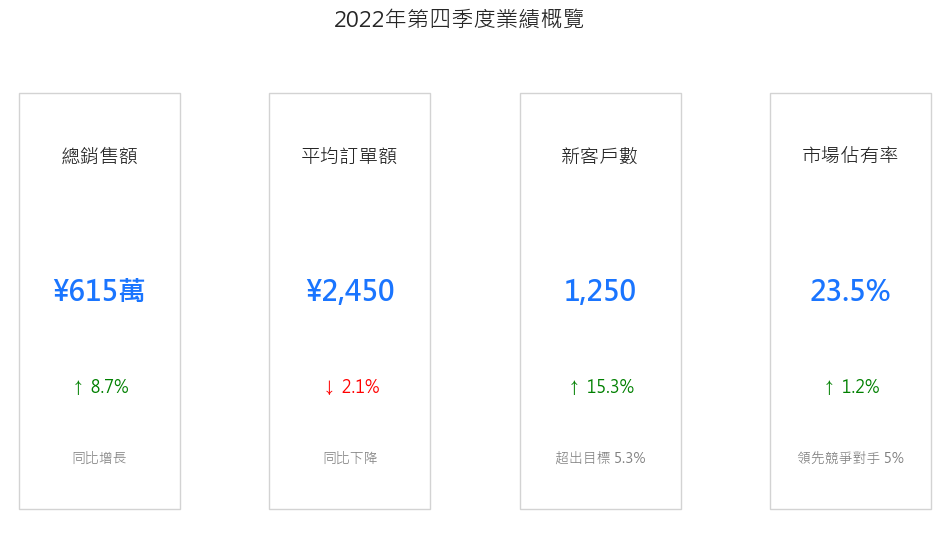

In [44]:
# 創建KPI卡片視覺化
fig = plt.figure(figsize=(12, 6))

# 設置網格佈局
grid = plt.GridSpec(1, 4, wspace=0.4, hspace=0.3)

# KPI 1: 總銷售額
ax1 = fig.add_subplot(grid[0, 0])
ax1.text(0.5, 0.8, '總銷售額', ha='center', fontsize=14)
ax1.text(0.5, 0.5, '¥615萬', ha='center', fontsize=20, fontweight='bold', color='#1a75ff')
ax1.text(0.5, 0.3, '↑ 8.7%', ha='center', fontsize=12, color='green')
ax1.text(0.5, 0.15, '同比增長', ha='center', fontsize=10, color='gray')
ax1.axis('off')
ax1.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, edgecolor='lightgray'))

# KPI 2: 平均訂單額
ax2 = fig.add_subplot(grid[0, 1])
ax2.text(0.5, 0.8, '平均訂單額', ha='center', fontsize=14)
ax2.text(0.5, 0.5, '¥2,450', ha='center', fontsize=20, fontweight='bold', color='#1a75ff')
ax2.text(0.5, 0.3, '↓ 2.1%', ha='center', fontsize=12, color='red')
ax2.text(0.5, 0.15, '同比下降', ha='center', fontsize=10, color='gray')
ax2.axis('off')
ax2.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, edgecolor='lightgray'))

# KPI 3: 新客戶數
ax3 = fig.add_subplot(grid[0, 2])
ax3.text(0.5, 0.8, '新客戶數', ha='center', fontsize=14)
ax3.text(0.5, 0.5, '1,250', ha='center', fontsize=20, fontweight='bold', color='#1a75ff')
ax3.text(0.5, 0.3, '↑ 15.3%', ha='center', fontsize=12, color='green')
ax3.text(0.5, 0.15, '超出目標 5.3%', ha='center', fontsize=10, color='gray')
ax3.axis('off')
ax3.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, edgecolor='lightgray'))

# KPI 4: 市場佔有率
ax4 = fig.add_subplot(grid[0, 3])
ax4.text(0.5, 0.8, '市場佔有率', ha='center', fontsize=14)
ax4.text(0.5, 0.5, '23.5%', ha='center', fontsize=20, fontweight='bold', color='#1a75ff')
ax4.text(0.5, 0.3, '↑ 1.2%', ha='center', fontsize=12, color='green')
ax4.text(0.5, 0.15, '領先競爭對手 5%', ha='center', fontsize=10, color='gray')
ax4.axis('off')
ax4.add_patch(plt.Rectangle((0.05, 0.05), 0.9, 0.9, fill=False, edgecolor='lightgray'))

plt.suptitle('2022年第四季度業績概覽', fontsize=16, y=0.98)
plt.show()


## 6. 漏斗圖 (Funnel Chart)

漏斗圖廣泛用於視覺化銷售流程、轉換率或產品流程。它能顯示各個階段的數量變化和轉化率，幫助識別流程中的瓶頸和改進機會。

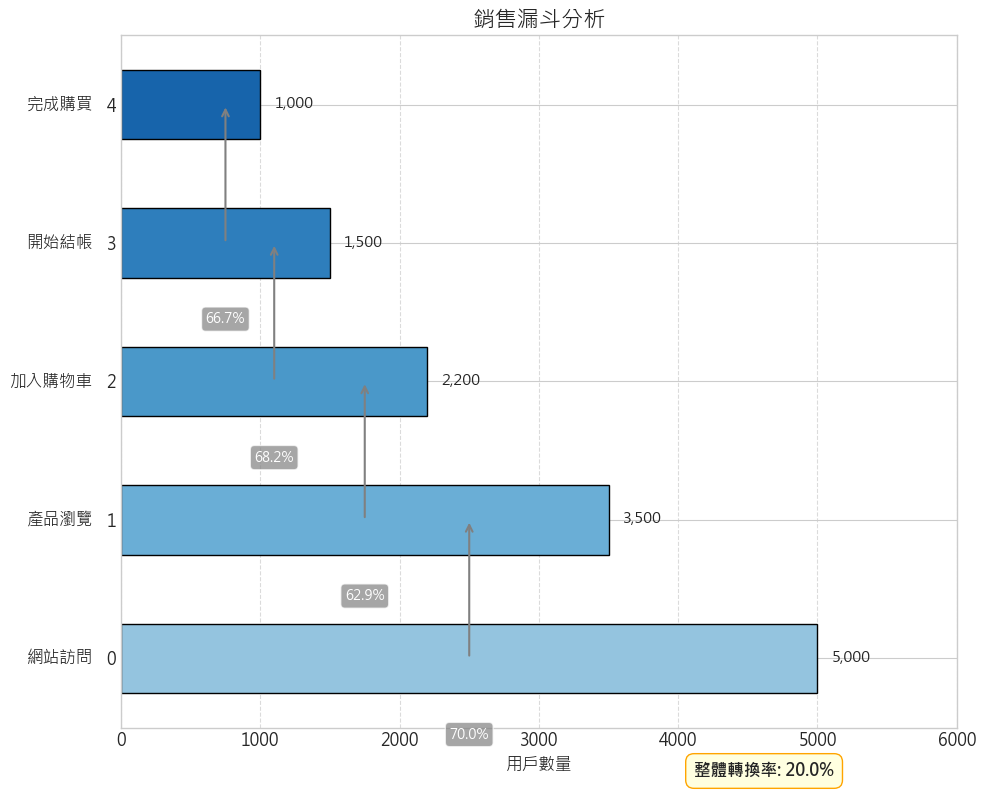

In [49]:
# 創建漏斗圖數據
stages = ['網站訪問', '產品瀏覽', '加入購物車', '開始結帳', '完成購買']
values = [5000, 3500, 2200, 1500, 1000]

# 計算轉換率
conv_rates = []
for i in range(1, len(values)):
    rate = values[i] / values[i-1] * 100
    conv_rates.append(f'{rate:.1f}%')

# 繪製漏斗圖
plt.figure(figsize=(10, 8))

# 計算每個階段的寬度比例
max_width = 0.8
width_step = max_width / len(stages)
widths = [max_width - i * width_step for i in range(len(stages))]

# 繪製每個階段的條形
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(stages)))
y_pos = np.arange(len(stages))

# 繪製水平條形圖
bars = plt.barh(y_pos, values, height=0.5, color=colors, edgecolor='black', linewidth=1)

# 添加階段名稱
for i, stage in enumerate(stages):
    plt.text(-200, i, stage, ha='right', va='center', fontsize=12)

# 添加數值標籤
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2, f'{width:,}', 
             ha='left', va='center', fontsize=11)
    
    # 添加轉換率
    if i < len(conv_rates):
        plt.text(width / 2, bar.get_y() - 0.3, conv_rates[i], 
                 ha='center', va='center', fontsize=10, color='white',
                 bbox=dict(boxstyle="round,pad=0.3", fc="gray", alpha=0.7))
        
        # 添加轉換箭頭
        plt.annotate('', xy=(width / 2, y_pos[i+1]), xytext=(width / 2, y_pos[i]),
                    arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

# 設置圖表元素
plt.title('銷售漏斗分析', fontsize=16)
plt.xlabel('用戶數量', fontsize=12)
plt.gca().invert_yaxis()  # 反轉y軸，使漏斗從上到下
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axis([0, max(values) * 1.2, -0.5, len(stages) - 0.5])

# 添加整體轉換率註釋
overall_rate = values[-1] / values[0] * 100
plt.figtext(0.7, 0.02, f'整體轉換率: {overall_rate:.1f}%', 
           fontsize=12, fontweight='bold',
           bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", ec="orange"))

plt.tight_layout()
plt.show()


## 7. KPI視覺化的最佳實踐

在設計KPI視覺化時，以下最佳實踐可以幫助你創建更有效的業務報告：

1. **突出重要信息**：確保最重要的KPI在視覺上脫穎而出
2. **提供上下文**：總是提供比較點和歷史趨勢
3. **保持簡潔**：避免視覺雜亂，移除不必要的元素
4. **一致的配色方案**：使用統一的顏色編碼來表示不同類型的數據
5. **使用適當的圖表類型**：基於數據特性選擇最合適的圖表
6. **適當的數據標記**：清晰標記所有數值，特別是關鍵的KPI
7. **考慮受眾**：根據報告受眾調整視覺化的複雜度和專業程度
8. **易讀性優先**：確保所有文本、標籤和圖例易於閱讀
9. **高亮變化和趨勢**：突出顯示重大變化、趨勢和偏差
10. **保持互動性**：如可能，添加互動功能以便深入分析


## 8. 總結

在本課程中，我們探討了多種用於KPI展示的視覺化技術，包括：

- **基本比較圖表**：用於並排比較不同時期或類別的表現
- **同比增長率圖**：結合長條圖和折線圖展示增長趨勢
- **瀑布圖**：清晰展示數值從起點到終點的變化過程
- **子彈圖**：高效地展示實際值與目標值的對比
- **KPI卡片**：簡潔地突出顯示關鍵業務指標
- **漏斗圖**：可視化流程中的轉換和流失

這些視覺化技術是數據分析師和商業智能專家的重要工具，能夠幫助管理者快速理解業務表現，識別問題和機會，並做出數據驅動的決策。

記住，有效的KPI視覺化不僅僅是數據的圖形表示，更是一種溝通工具，目的是清晰、準確、有效地傳達業務洞察。選擇正確的圖表類型、恰當的數據標記和有意義的比較點，對於創建有價值的商業報告至關重要。